In [ ]:
print(4+4)

8


Import Necessary Lib

In [ ]:
!pip install tensorflow tensorflow-datasets matplotlib seaborn numpy
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import pandas as pd
import numpy as np

Load the Dataset

In [ ]:
dataset, info = tfds.load('plant_village', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.1DPJGQ_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


**DataSet Info**

In [ ]:
print(info)


tfds.core.DatasetInfo(
    name='plant_village',
    full_name='plant_village/1.0.2',
    description="""
    The PlantVillage dataset consists of 54303 healthy and unhealthy leaf images
    divided into 38 categories by species and disease.
    
    NOTE: The original dataset is not available from the original source
    (plantvillage.org), therefore we get the unaugmented dataset from a paper that
    used that dataset and republished it. Moreover, we dropped images with
    Background_without_leaves label, because these were not present in the original
    dataset.
    
    Original paper URL: https://arxiv.org/abs/1511.08060 Dataset URL:
    https://data.mendeley.com/datasets/tywbtsjrjv/1
    """,
    homepage='https://arxiv.org/abs/1511.08060',
    data_dir=PosixGPath('/tmp/tmpt3xhi6w8tfds'),
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=815.37 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/f

**Class Labels**

In [ ]:
class_names = info.features['label'].names
print("Available Classes:", class_names)


Available Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic

Dataset Distribution

In [ ]:
train_data = dataset['train']
labels = [label.numpy() for _, label in train_data]  # Use .numpy() on the Tensor, not the NumPy array
label_counts = Counter(labels)

for label, count in label_counts.items():
    print(f"{class_names[label]}: {count}")

Tomato___Target_Spot: 1404
Orange___Haunglongbing_(Citrus_greening): 5507
Tomato___Late_blight: 1908
Potato___Early_blight: 1000
Apple___healthy: 1645
Apple___Cedar_apple_rust: 275
Pepper,_bell___healthy: 1477
Tomato___Spider_mites Two-spotted_spider_mite: 1676
Tomato___Bacterial_spot: 2127
Squash___Powdery_mildew: 1835
Tomato___healthy: 1591
Cherry___Powdery_mildew: 1052
Tomato___Tomato_mosaic_virus: 373
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357
Peach___Bacterial_spot: 2297
Strawberry___Leaf_scorch: 1109
Apple___Apple_scab: 630
Soybean___healthy: 5090
Corn___healthy: 1162
Blueberry___healthy: 1502
Apple___Black_rot: 621
Grape___Black_rot: 1180
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076
Pepper,_bell___Bacterial_spot: 997
Corn___Common_rust: 1192
Tomato___Septoria_leaf_spot: 1771
Tomato___Early_blight: 1000
Tomato___Leaf_Mold: 952
Grape___Esca_(Black_Measles): 1383
Corn___Northern_Leaf_Blight: 985
Potato___Late_blight: 1000
Raspberry___healthy: 371
Grape___healthy: 423
Cherry__

Sample Pics

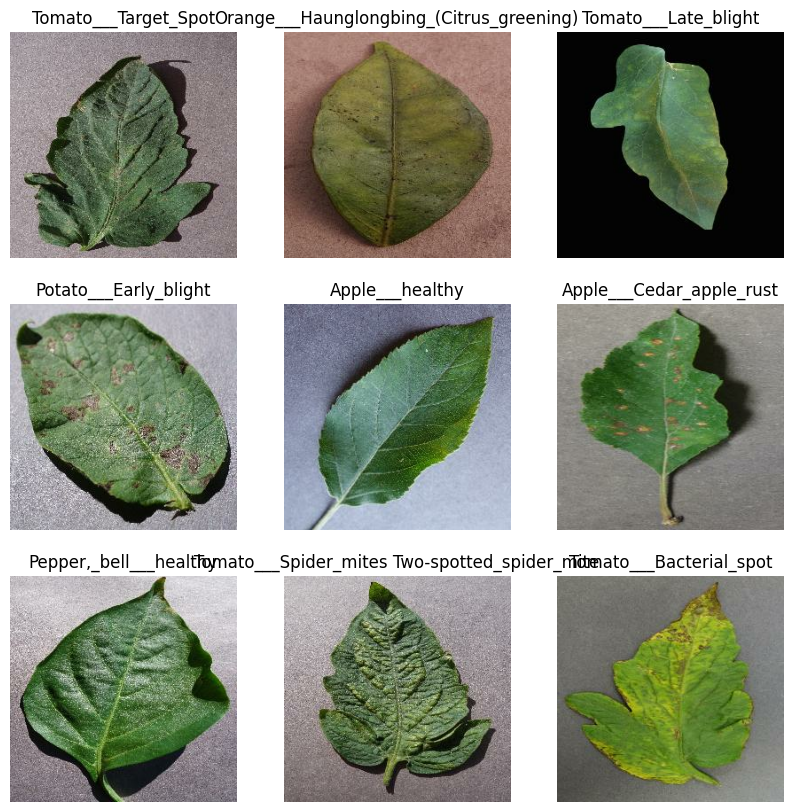

In [ ]:
def show_images(dataset, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(class_names[label.numpy()])
        plt.axis("off")

show_images(train_data, class_names)


Analyze Image Dimension

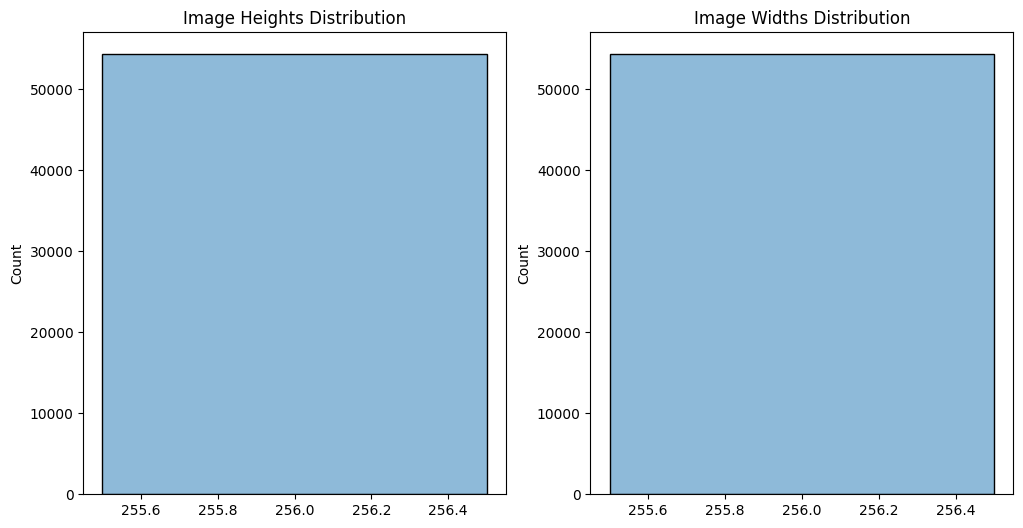

In [ ]:
image_shapes = [image.shape for image, _ in tfds.as_numpy(train_data)]  # Remove .numpy()
heights = [shape[0] for shape in image_shapes]
widths = [shape[1] for shape in image_shapes]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(heights, kde=True)
plt.title("Image Heights Distribution")

plt.subplot(1, 2, 2)
sns.histplot(widths, kde=True)
plt.title("Image Widths Distribution")
plt.show()

Analyze Color Channel

In [ ]:
def calculate_channel_means(dataset, num_samples=1000):
    r_means, g_means, b_means = [], [], []
    for i, (image, _) in enumerate(tfds.as_numpy(dataset.take(num_samples))):
        r_means.append(np.mean(image[:, :, 0]))
        g_means.append(np.mean(image[:, :, 1]))
        b_means.append(np.mean(image[:, :, 2]))
    return np.mean(r_means), np.mean(g_means), np.mean(b_means)

r_mean, g_mean, b_mean = calculate_channel_means(train_data)
print(f"Red Channel Mean: {r_mean}")
print(f"Green Channel Mean: {g_mean}")
print(f"Blue Channel Mean: {b_mean}")


Red Channel Mean: 117.65360498046876
Green Channel Mean: 124.73754830932617
Blue Channel Mean: 103.36006553649902


Plot Class Distribution


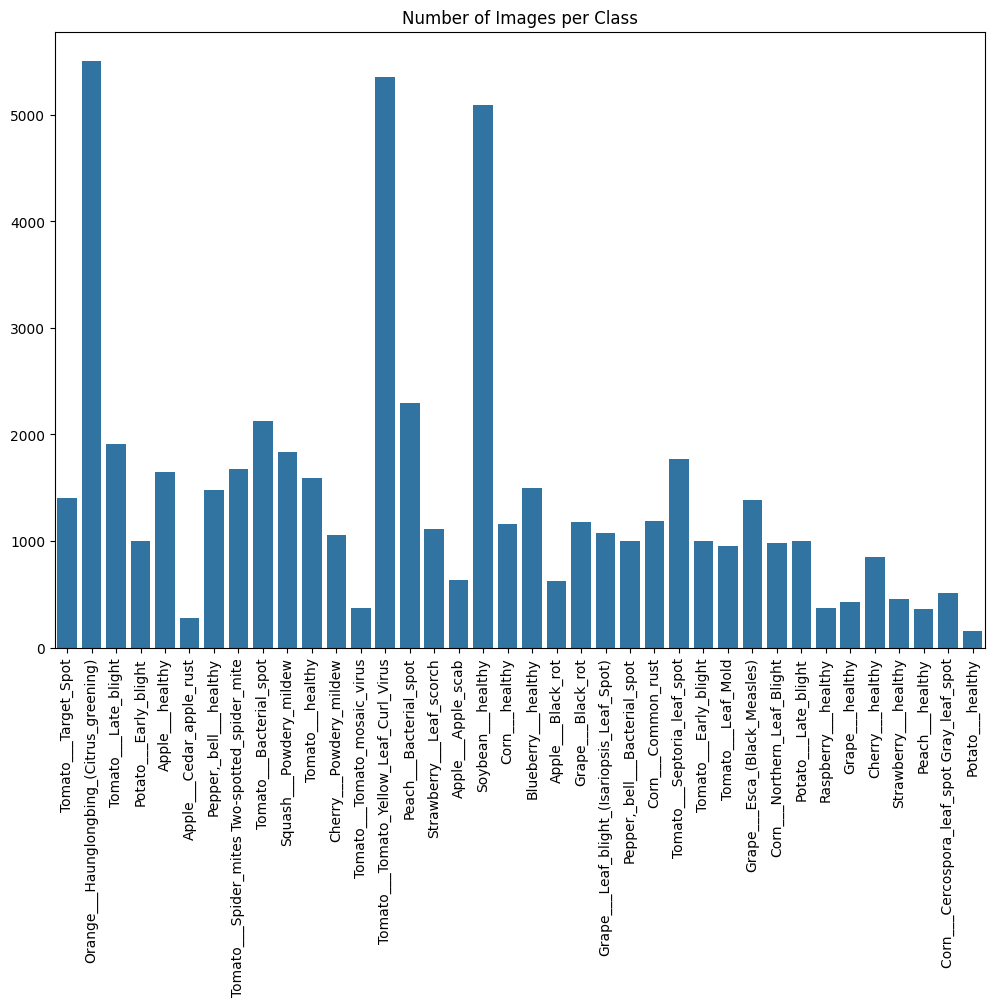

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=[class_names[i] for i in label_counts.keys()], y=list(label_counts.values()))
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.show()


Analyze the Distribution of Healthy vs Diseased Leaves
Problem

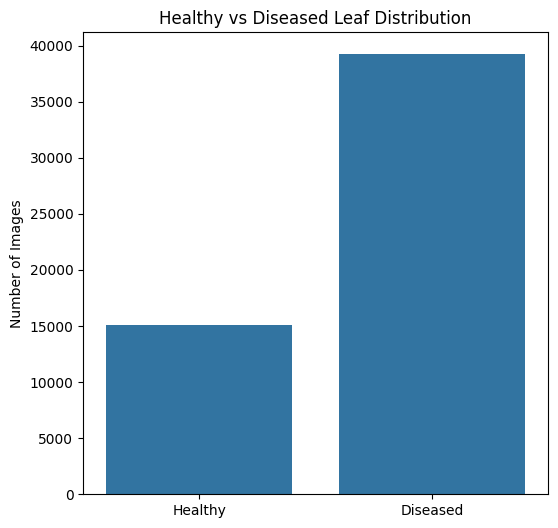

In [ ]:
healthy_diseased_counts = {'Healthy': 0, 'Diseased': 0}

for label, count in label_counts.items():
    if 'healthy' in class_names[label].lower():
        healthy_diseased_counts['Healthy'] += count
    else:
        healthy_diseased_counts['Diseased'] += count

plt.figure(figsize=(6, 6))
sns.barplot(x=list(healthy_diseased_counts.keys()), y=list(healthy_diseased_counts.values()))
plt.title("Healthy vs Diseased Leaf Distribution")
plt.ylabel("Number of Images")
plt.show()


Find Which Plants Are Most Affected by Diseases


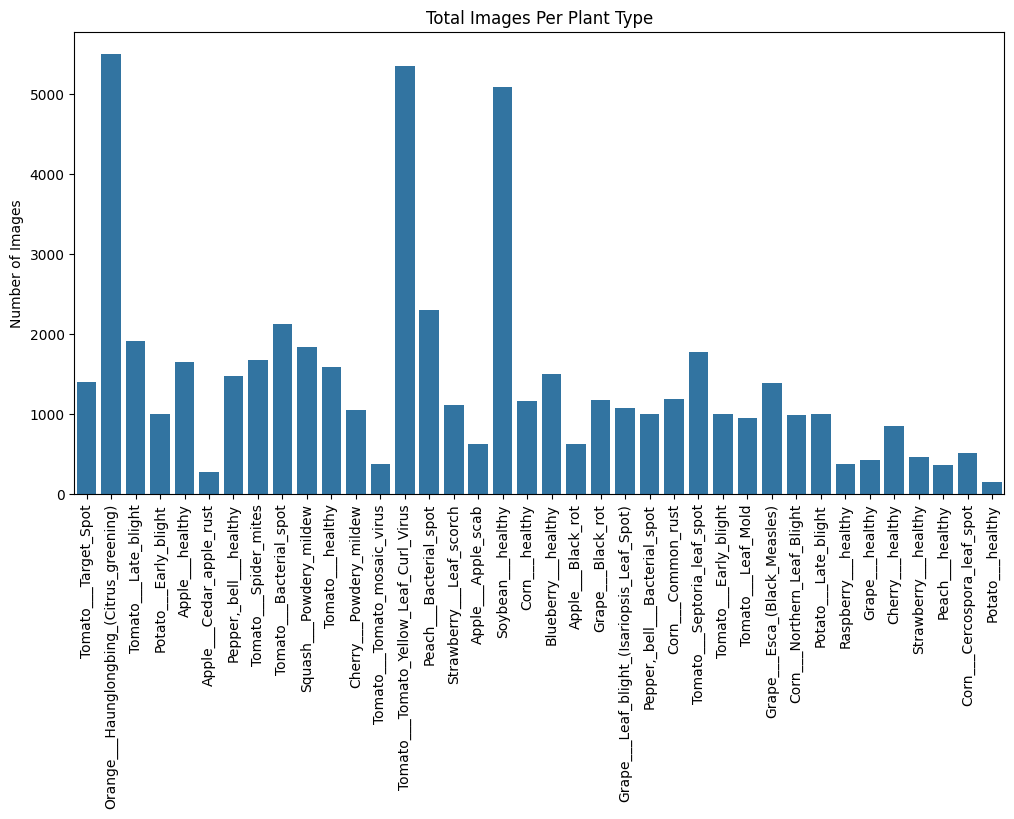

In [ ]:
plant_disease_counts = {}

for label, count in label_counts.items():
    plant_name = class_names[label].split(" ")[0]  # Extract plant name (e.g., "Apple", "Tomato")
    if plant_name not in plant_disease_counts:
        plant_disease_counts[plant_name] = 0
    plant_disease_counts[plant_name] += count

plt.figure(figsize=(12, 6))
sns.barplot(x=list(plant_disease_counts.keys()), y=list(plant_disease_counts.values()))
plt.xticks(rotation=90)
plt.title("Total Images Per Plant Type")
plt.ylabel("Number of Images")
plt.show()


Check If There Is Any Class Imbalance
Problem

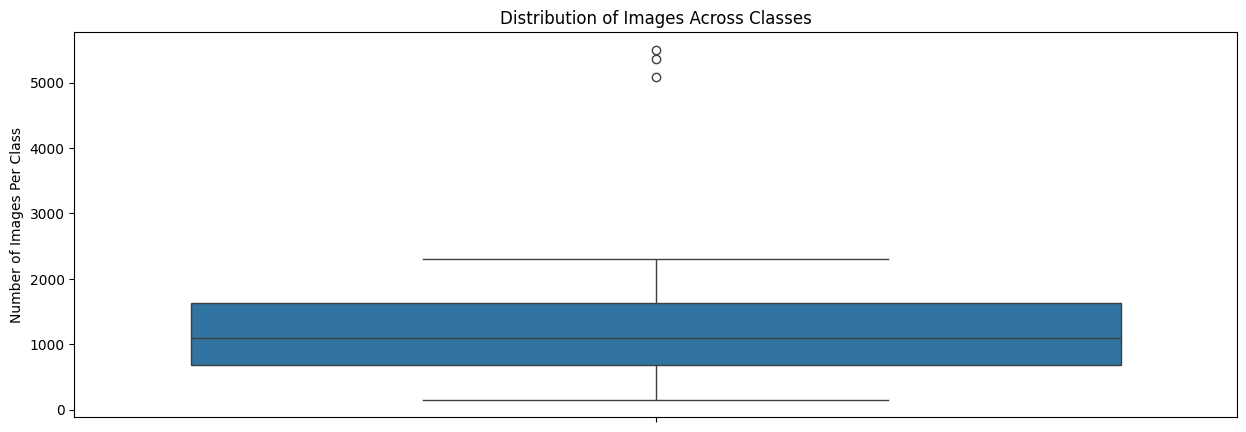

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(y=list(label_counts.values()))
plt.title("Distribution of Images Across Classes")
plt.ylabel("Number of Images Per Class")
plt.show()


 Analyze RGB Color Differences Between Healthy and Diseased Leaves


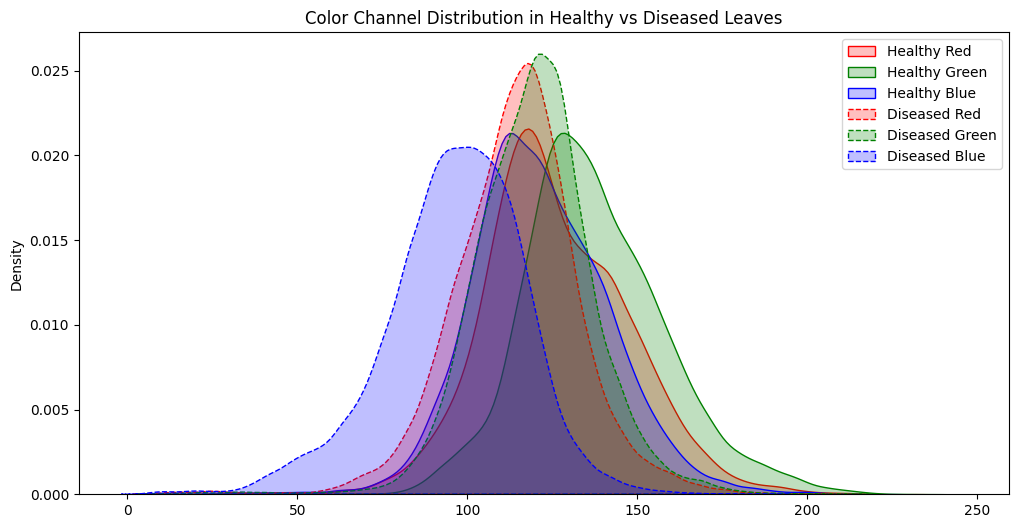

In [ ]:
healthy_r, healthy_g, healthy_b = [], [], []
diseased_r, diseased_g, diseased_b = [], [], []

for image, label in tfds.as_numpy(train_data):
    mean_r, mean_g, mean_b = np.mean(image[:, :, 0]), np.mean(image[:, :, 1]), np.mean(image[:, :, 2])

    if 'healthy' in class_names[label].lower():
        healthy_r.append(mean_r)
        healthy_g.append(mean_g)
        healthy_b.append(mean_b)
    else:
        diseased_r.append(mean_r)
        diseased_g.append(mean_g)
        diseased_b.append(mean_b)

plt.figure(figsize=(12, 6))

sns.kdeplot(healthy_r, color="red", label="Healthy Red", fill=True)
sns.kdeplot(healthy_g, color="green", label="Healthy Green", fill=True)
sns.kdeplot(healthy_b, color="blue", label="Healthy Blue", fill=True)

sns.kdeplot(diseased_r, color="red", linestyle="dashed", label="Diseased Red", fill=True)
sns.kdeplot(diseased_g, color="green", linestyle="dashed", label="Diseased Green", fill=True)
sns.kdeplot(diseased_b, color="blue", linestyle="dashed", label="Diseased Blue", fill=True)

plt.title("Color Channel Distribution in Healthy vs Diseased Leaves")
plt.legend()
plt.show()


 Check the Average Brightness of Healthy vs Diseased Leaves


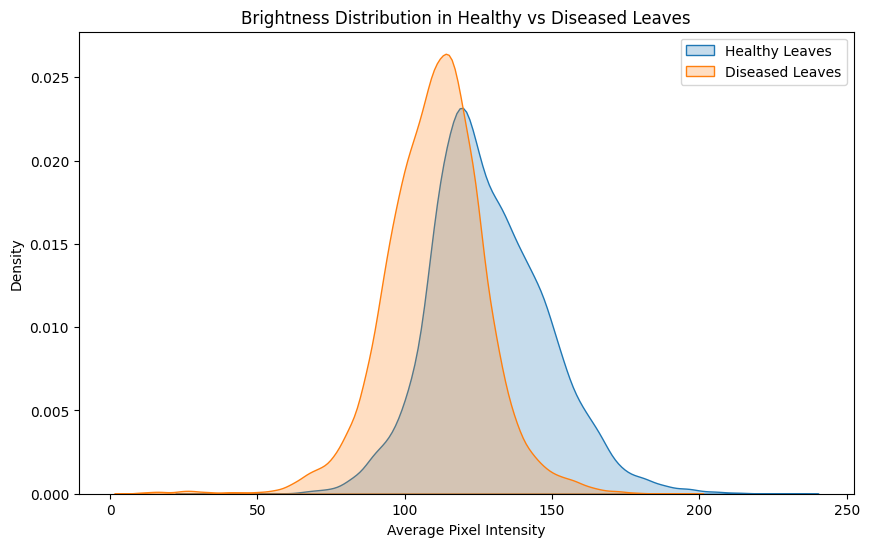

In [ ]:
healthy_brightness = []
diseased_brightness = []

for image, label in tfds.as_numpy(train_data):
    brightness = np.mean(image)

    if 'healthy' in class_names[label].lower():
        healthy_brightness.append(brightness)
    else:
        diseased_brightness.append(brightness)

plt.figure(figsize=(10, 6))
sns.kdeplot(healthy_brightness, label="Healthy Leaves", fill=True)
sns.kdeplot(diseased_brightness, label="Diseased Leaves", fill=True)
plt.title("Brightness Distribution in Healthy vs Diseased Leaves")
plt.xlabel("Average Pixel Intensity")
plt.legend()
plt.show()
